### Calculating equilibrium compositions for an O<sub>2</sub> plasma

Calculations for plasmas consisting of species of a single element are a useful starting point because they are simple examples to illustrate the functionality of minplascalc, and their experimental and theoretical/calculated properties are very well documented in literature; they therefore make useful validation cases.

In order to specify a plasma mixture in minplascalc, a small text file in the JSON format must be generated by the user. This file should contain a dictionary with the name of each species present in the plasma at equilibrium (this is generally all species for which data is available and which contain any of the elements present), and their initial mole fractions (which are used only to determine the initial atom counts for each element, $\eta_i^0$). The electron species does not need to be explicitly specified - it is added automatically upon instantiation of a minplascalc Mixture object, since every plasma is assumed to contain free electrons.

Let's look at the case of an oxygen plasma, which includes species O<sub>2</sub>, O<sub>2</sub><sup>+</sup>, O, O<sup>+</sup>, and O<sup>2+</sup>. In this case the mixture file should look like this:
    
    {
        "name": "Pure oxygen plasma",
        "speciesList": 
        [
            { "species": "O2", "x0": 1 },
            { "species": "O2+", "x0": 0 },
            { "species": "O", "x0": 0 },
            { "species": "O+", "x0": 0 },
            { "species": "O++", "x0": 0 }
        ]
    }

Note that in this case, any set of initial mole fractions of the various species will give the same result provided they sum to unity - this is because oxygen is the only element present in the plasma. This file has already been generated and is available in the demo set of data packaged with minplascalc (at minplascalc/data/mixtures/O2_plasma.json). In order to calculate the composition of the plasma at various temperatures using these species, execute the following code snippets in order. The text in between indicates what each part of the code is doing.

We start off by importing the modules we need - matplotlib for drawing graphs, numpy for array functions, and minplascalc itself.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import minplascalc as mpc

Next, we create a minplascalc Mixture object using the path to the mixture file. The temperature in K and pressure in Pa may optionally be specified in the constructor too, and will be initialised to those values.

In [2]:
mixture = mpc.Mixture(str(mpc.MIXTUREPATH / "O2_plasma.json"), 1000, 101325)

Next, set a range of temperatures to calculate the equilibrium compositions at - in this case we're going from 1000 to 25000 K in 100 steps. Also initialise a list to store the composition result at each temperature

In [3]:
temperatures = np.linspace(1000, 25000, 100)
ni = [[] for n in range(len(mixture.species))]

Now we're ready to actually perform the composition calculations. We loop over all the temperatures, setting the mixture object's temperature attribute to the appropriate value, initialising the species numbers using the Mixture object's <span style="font-family: 'Courier';">initialiseNi(Ni)</span> function (which takes a list of the initial guesses of the $N_i$ value for each species), and calculating the LTE composition using the object's <span style="font-family: 'Courier';">solveGfe()</span> function. Note that execution of this calculation is fairly compute intensive and the following code snippet may take a few seconds to complete.

In [4]:
speciesnames = []
for T in temperatures:
    mixture.T = T
    mixture.initialiseNi([1e20 for n in range(len(mixture.species))])
    mixture.solveGfe()
    for j, sp in enumerate(mixture.species):
        ni[j].append(sp.numberDensity)
        speciesnames.append(sp.name)

Now we can visualise the results by plotting the plasma composition against temperature, to see how it varies.

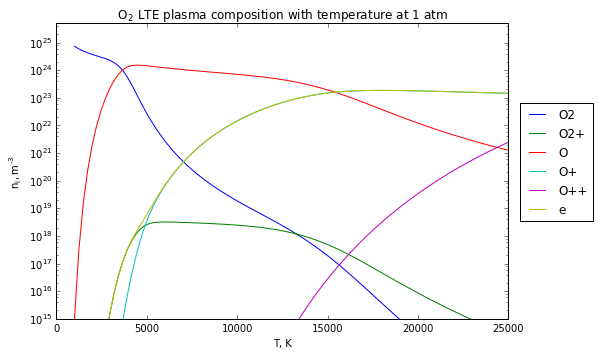

In [5]:
fig, ax0 = plt.subplots(1, 1, figsize=(7.5, 5))
ax0.set_title("$\mathregular{O_2}$ LTE plasma composition with temperature at 1 atm")
ax0.set_xlabel("T, K")
ax0.set_ylabel("$\mathregular{n_i, m^{-3}}$")
ax0.set_ylim(1e15, 5e25)
for spn, sn in zip(ni, speciesnames):
    ax0.semilogy(temperatures, spn, label=sn);
ax0.legend(bbox_to_anchor=(1.2, 0.75));
plt.tight_layout()

The results obtained using minplascalc compare favourably with calculations by other authors, for example Boulos et al 1994 (see README for full reference). Some small deviations occur at very low concentration levels, but the impact of these low-concentration species on actual plasma behaviour is expected to be small since their concentrations are more than six orders of magnitude smaller than the dominant components.